In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


df= pd.read_csv(r'data\breast-cancer.csv')
# Explore shape
print("Shape:", df.shape)

# First 5 rows
print(df.head())

# Basic info
print(df.info())

# Check class distribution
print("Class distribution:\n", df['diagnosis'].value_counts())

# Summary statistics
df.describe()





Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimete

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Show correlation of all features with target
print(corr['diagnosis'].sort_values(ascending=False))

sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.show()

ValueError: could not convert string to float: 'M'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv(r'data\breast-cancer.csv')

# Convert target (M/B) → numeric
le = LabelEncoder()
y = le.fit_transform(df['diagnosis'])   # M/B → 0/1

# Pick 2 features
X = df[['radius_mean', 'texture_mean']]

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Standardize features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 3. Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_s, y_train)
log_acc = accuracy_score(y_test, log_clf.predict(X_test_s))

# 4. SVM (linear kernel)
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_s, y_train)
svm_acc = accuracy_score(y_test, svm_clf.predict(X_test_s))

print(f"Logistic Regression accuracy: {log_acc:.3f}")
print(f"SVM (linear) accuracy:       {svm_acc:.3f}")


Logistic Regression accuracy: 0.868
SVM (linear) accuracy:       0.868


400 100 69
target                  1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: target, dtype: float64


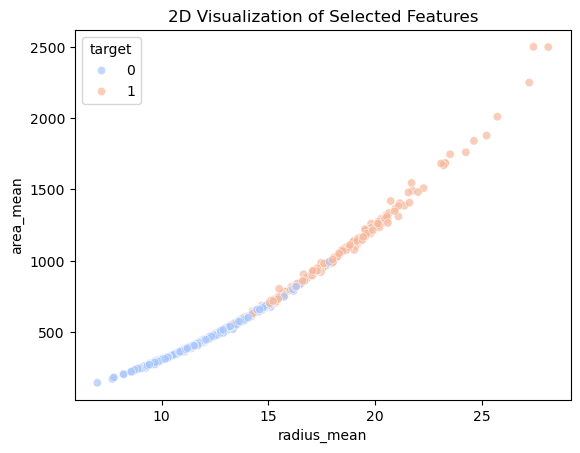

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


le = LabelEncoder()
df['target'] = le.fit_transform(df['diagnosis'])

X = df.drop(columns=['diagnosis', 'target'])
y = df['target']

# Split 400 for training, 100 for validation, 69 for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=400, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=69, random_state=42, stratify=y_temp)

print(len(X_train), len(X_val), len(X_test))

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
# Sort correlation of all features with the target
corr_target = corr['target'].sort_values(ascending=False)
print(corr_target.head(10))

plot_df = df[['radius_mean', 'area_mean', 'target']]

sns.scatterplot(
    data=plot_df,
    x='radius_mean',
    y='area_mean',
    hue='target',
    palette='coolwarm',
    alpha=0.7
)
plt.title('2D Visualization of Selected Features')
plt.show()

